# Top

In [1]:
import numpy as np
from numpy import ndarray

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from typing import Callable, Dict, List, Tuple

In [2]:
def set_default(figsize=(10, 10), dpi=100):
    plt.style.use(['dark_background', 'bmh'])
    plt.rc('axes', facecolor='k')
    plt.rc('figure', facecolor='k')
    plt.rc('figure', figsize=figsize, dpi=dpi)
    plt.rc('font', size=15)


set_default()

In [3]:
TEST_ALL = True

# Dataset

In [4]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
data = boston.data
target = boston.target
features = boston.feature_names

In [6]:
print(data.shape)
print(target.shape)
print(features)

(506, 13)
(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# Standardize features by removing the mean and scaling to unit variance
s = StandardScaler()
data = s.fit_transform(data)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data,
                                                    target,
                                                    test_size=0.3,
                                                    random_state=80718)
y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)

# Model Error Function

In [10]:
def mae(preds: ndarray, actuals: ndarray):
    '''
    Computes mean absolute error
    '''
    return np.mean(np.abs(preds - actuals))


def rmse(preds: ndarray, actuals: ndarray):
    '''
    Computes root mean squared error
    '''
    return np.sqrt(np.mean(np.power(preds - actuals, 2)))

# sk-learn Linear Regression

In [11]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

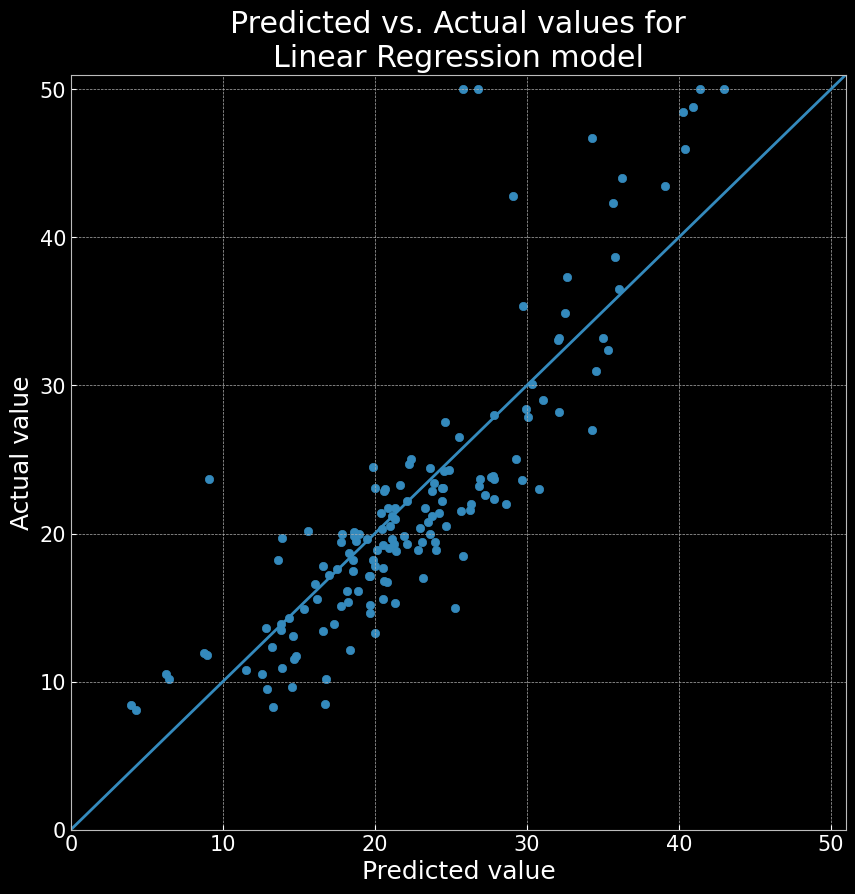

In [12]:
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Predicted vs. Actual values for\nLinear Regression model")
plt.xlim([0, 51])
plt.ylim([0, 51])
plt.scatter(preds, y_test)
plt.plot([0, 51], [0, 51])

## [!] Deterine the Most Important Feature

p57: a larger coefficient means that the feature is more important

The last one (-4.19, index 12) is the most important feature


In [15]:
np.round(lr.coef_, 2)

array([[-1.01,  0.71,  0.28,  0.71, -2.21,  2.38,  0.71, -2.66,  2.63,
        -1.82, -2.33,  0.85, -4.19]])

In [72]:
# Preview the last feature
np.round(X_test[:, 12], 4)

array([-1.2396e+00,  1.2794e+00,  7.1170e-01,  2.9951e+00,  8.6500e-02,
       -3.4250e-01,  8.6860e-01, -3.3400e-01, -1.1092e+00,  2.3685e+00,
       -9.0600e-01,  4.9720e-01,  1.2009e+00, -1.3377e+00,  6.2470e-01,
       -8.8210e-01,  1.0733e+00, -4.3780e-01, -6.6630e-01, -3.0880e-01,
       -9.3540e-01, -4.4200e-01,  5.4060e-01, -8.3170e-01, -6.4520e-01,
       -2.1770e-01, -4.4200e-01, -1.2788e+00, -9.2560e-01,  6.9340e-01,
        2.1905e+00,  1.3256e+00, -6.8870e-01,  3.7400e-02, -3.8870e-01,
       -1.3307e+00, -1.1835e+00, -4.5320e-01, -1.0461e+00, -1.0321e+00,
       -1.3377e+00,  2.8130e-01, -1.2241e+00, -2.1500e-02, -7.9100e-01,
       -7.0830e-01, -3.5090e-01, -3.1300e-02,  2.3867e+00, -5.9200e-01,
        2.7990e-01,  1.6690e+00, -3.5370e-01, -1.4060e-01, -8.6530e-01,
       -6.3820e-01, -2.0090e-01, -3.1300e-02,  2.3510e-01,  4.4670e-01,
        8.6500e-02, -1.2746e+00,  6.3180e-01, -1.4961e+00,  8.4480e-01,
       -7.1810e-01, -1.1148e+00,  1.0186e+00,  1.1490e+00,  8.49

As you can see this is a non linear relationship. As our "most important" feature increases our target decreases in a nonlinear manner.

Text(0.5, 1.0, 'Relationship between most\nimportant feature and target')

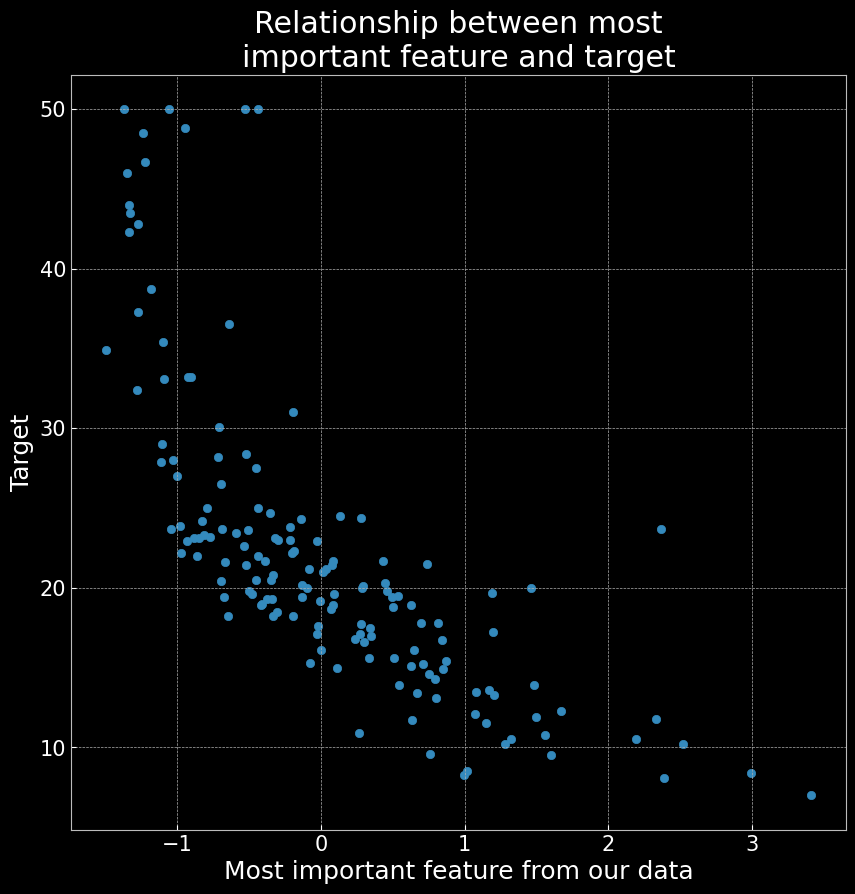

In [13]:
plt.scatter(X_test[:, 12], y_test)
plt.xlabel("Most important feature from our data")
plt.ylabel("Target")
plt.title("Relationship between most\nimportant feature and target")

## Model Eval

In [14]:
print("Mean absolute error: ", round(mae(preds, y_test), 4), "\n"
      "Root mean squared error: ", round(rmse(preds, y_test), 4))

Mean absolute error:  3.5671 
Root mean squared error:  5.0476


# Manual Linear Regression

Using These Gradients to Train the Model

1. Select a batch of data.
2. Run the forward pass of the model.
3. Run the backward pass of the model using the info computed on the forward pass.
4. Use the gradients computed on the backward pass to update the weights.

In [16]:
# def forward_linear_regression(
#         X_batch: ndarray, 
#         y_batch: ndarray,
#         weights: Dict[str, ndarray]) -> Tuple[float, Dict[str, ndarray]]:
#     '''
#     Forward pass for the step-by-step Linear regression
#     '''
#     # asser batch sizes of X and y are equal
#     assert X_batch.shape[0] == y_batch.shape[0]

#     # assert that we can matmul X with all weights
#     assert X_batch.shape[1] == weights['W'].shape[0]

#     # assert that B is a scalar
#     assert weigths['B'].shape[0] == weights['B'].shape[1] == 1

#     # Compute the operations on the forward pass
#     N = np.dot(X_batch, weitghts['W'])

#     P = N + weights['B']

#     loss = np.mean(np.power(y_batch - P, 2))

#     # save info computed on the forward pass
#     forward_info: Dict[str, ndarray] = {}
#     forward_info['X'] = X_batch
#     forward_info['N'] = N
#     forward_info['P'] = P
#     forward_info['y'] = y_batch

#     return loss, forward_info

In [17]:
# def to_2d_np(a: ndarray, type: str = "col") -> ndarray:
#     '''
#     Turns a 1D tensor into a 2D tensor
#     '''
#     assert a.ndim == 1, \
#     "Input tensors must be 1 dimensional"

#     if type == "col":
#         return a.reshape(-1, 1)
#     elif type == "row":
#         return a.reshape(1, -1)

## Loss and Gradients

In [18]:
def loss_gradients(forward_info: Dict[str, ndarray],
                   weights: Dict[str, ndarray]) -> Dict[str, ndarray]:
    '''
    Compute dLdW and dLdB for the step-by-step linear reg model

    X \
        func_1 -> func_2 -> sum -> L
    W /        N    |    P
                    B 

    '''
    batch_size = forward_info['X'].shape[0]

    dLdP = -2 * (forward_info['y'] - forward_info['P'])

    dPdN = np.ones_like(forward_info['N'])

    dPdB = np.ones_like(weights['B'])

    # dLdN = dLdP * dPdN

    dNdW = np.transpose(forward_info['X'], (1, 0))

    # L, P, N, W
    # use matmul, dNdW must be on the left for the dimensions to align
    dLdW = np.dot(dNdW, dLdP * dPdN)

    # L, P, B
    # must sum along the dimension representing the batch size
    dLdB = (dLdP * dPdB).sum(axis=0)

    loss_grad: Dict[str, ndarray] = {}
    loss_grad['W'] = dLdW
    loss_grad['B'] = dLdB

    return loss_grad

In [19]:
def forward_loss(
        X: ndarray, 
        y: ndarray,
        weights: Dict[str, ndarray]) -> Tuple[Dict[str, ndarray], float]:
    '''
    Generate predictions and calculate loss
    '''
    N = np.dot(X, weights['W'])

    P = N + weights['B']  # prediction

    loss = np.mean(np.power(y - P, 2))  # mse

    forward_info: Dict[str, ndarray] = {}
    forward_info['X'] = X
    forward_info['N'] = N
    forward_info['P'] = P
    forward_info['y'] = y

    return forward_info, loss

## Train Functions

In [20]:
def init_weights(n_in: int) -> Dict[str, ndarray]:
    '''
    Initialize weights on first forward pass of model
    '''
    weights: Dict[str, ndarray] = {}
    W = np.random.randn(n_in, 1)
    B = np.random.randn(1, 1)

    weights['W'] = W
    weights['B'] = B

    return weights

In [21]:
Batch = Tuple[ndarray, ndarray]

In [22]:
def generate_batch(X: ndarray,
                   y: ndarray,
                   start: int = 0,
                   batch_size: int = 10) -> Batch:
    '''
    Generate batch from X and y, given a start position
    '''
    assert X.ndim == y.ndim == 2, \
    "X and y must be 2 dimensional"

    if start + batch_size > X.shape[0]:
        batch_size = X.shape[0] - start

    X_batch, y_batch = X[start:start + batch_size], y[start:start + batch_size]

    return X_batch, y_batch

In [23]:
def permute_data(X: ndarray, y: ndarray):
    '''
    Permute X and y, using the same permutation, along axis=0
    '''
    perm = np.random.permutation(X.shape[0])
    return X[perm], y[perm]

## Train

In [24]:
def train(X: ndarray,
          y: ndarray,
          n_iter: int = 1000,
          learning_rate: float = 0.01,
          batch_size: int = 100,
          return_losses: bool = False,
          return_weights: bool = False,
          seed: int = 1) -> None:
    '''
    Train the model for a certain number of epochs
    '''
    if seed:
        np.random.seed(seed)
    start = 0

    # Initialize weights
    weights = init_weights(X.shape[1])

    # Permute data
    X, y = permute_data(X, y)

    if return_losses:
        losses = []

    for i in range(n_iter):

        # Generate batch
        if start >= X.shape[0]:
            X, y = permute_data(X, y)
            start = 0

        X_batch, y_batch = generate_batch(X, y, start, batch_size)
        start += batch_size

        # Train net using generated batch
        forward_info, loss = forward_loss(X_batch, y_batch, weights)

        if return_losses:
            losses.append(loss)

        loss_grads = loss_gradients(forward_info, weights)
        for key in weights.keys():
            weights[key] -= learning_rate * loss_grads[key]

    if return_weights:
        return losses, weights

    return None

In [25]:
train_info = train(X_train,
                   y_train,
                   n_iter=1000,
                   learning_rate=0.001,
                   batch_size=23,
                   return_losses=True,
                   return_weights=True,
                   seed=80718)
losses = train_info[0]
weights = train_info[1]

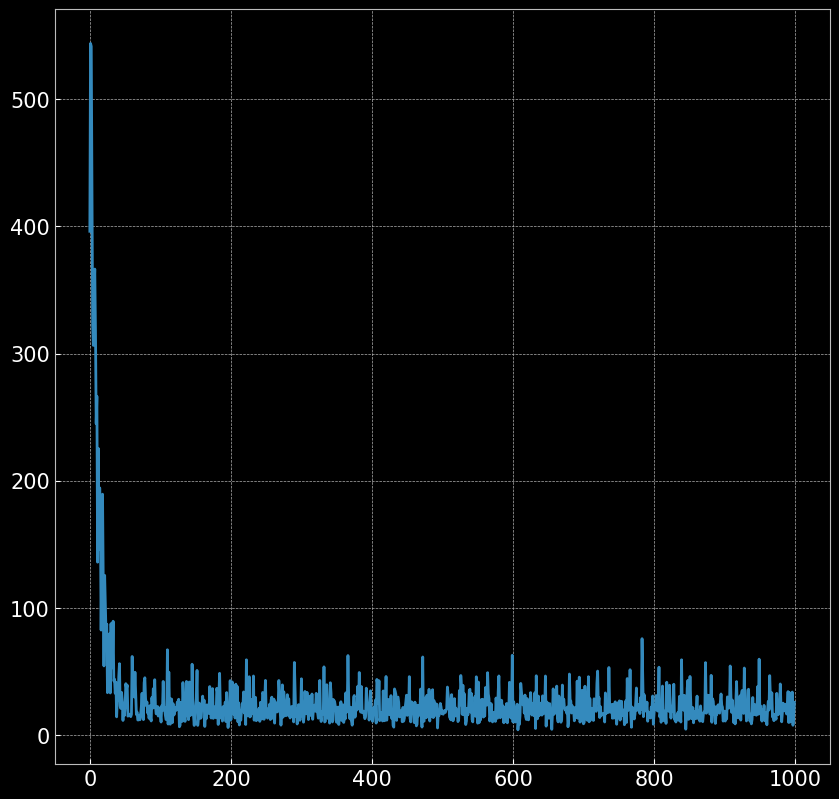

In [26]:
plt.plot(list(range(1000)), losses)

## Predict

In [27]:
def predict(X: ndarray, weights: Dict[str, ndarray]):
    '''
    Generate predictions from the manual linear regression
    '''
    N = np.dot(X, weights['W'])

    return N + weights['B']

In [28]:
preds = predict(X_test, weights)

In [29]:
print("Mean absolute error: ", round(mae(preds, y_test), 4), "\n"
      "Root mean squared error: ", round(rmse(preds, y_test), 4))

Mean absolute error:  3.5423 
Root mean squared error:  5.0361


In [30]:
np.round(y_test.mean(), 4)

22.0776

In [31]:
np.round(rmse(preds, y_test) / y_test.mean(), 4)

0.2281

the above metric shows that rmse is ~23% on average of y

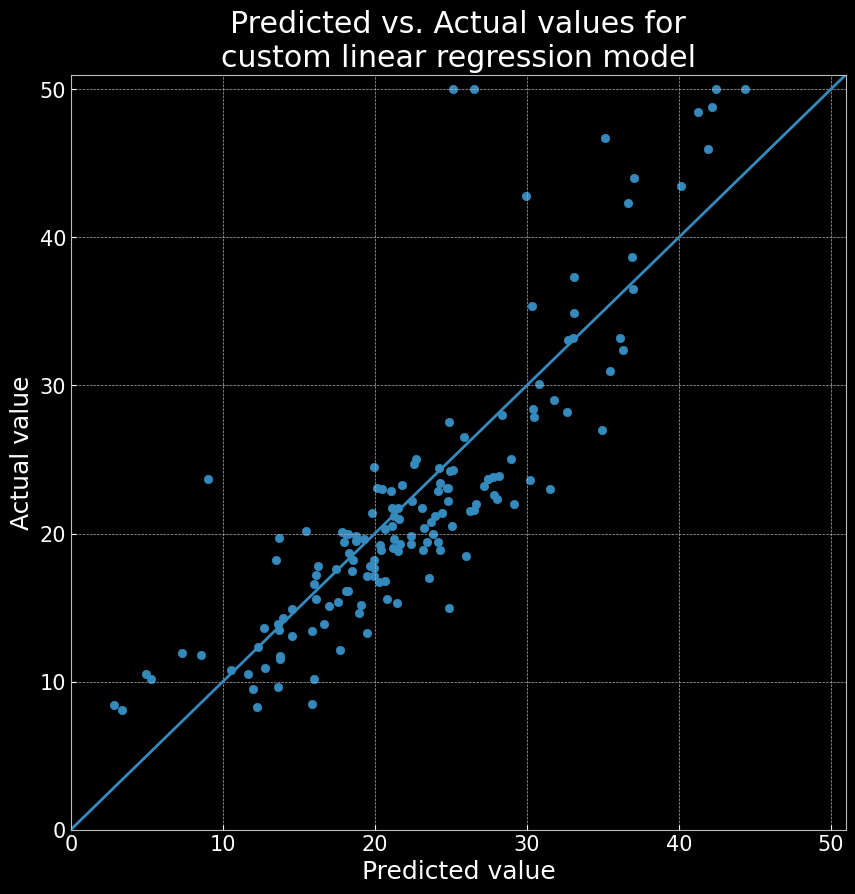

In [32]:
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Predicted vs. Actual values for\ncustom linear regression model")
plt.xlim([0, 51])
plt.ylim([0, 51])
plt.scatter(preds, y_test)
plt.plot([0, 51], [0, 51])

## Compare Coefficients (sk-learn vs Manual)

In [33]:
np.round(weights['W'].reshape(-1), 4)

array([-1.0789,  0.6364,  0.1337,  0.8132, -2.2458,  2.5866,  0.6822,
       -2.691 ,  2.4622, -1.8756, -2.4472,  0.9043, -4.2393])

In [34]:
np.round(lr.coef_, 4)

array([[-1.0148,  0.7065,  0.276 ,  0.7092, -2.206 ,  2.3793,  0.7133,
        -2.6625,  2.6325, -1.8172, -2.3266,  0.8465, -4.1889]])

In [35]:
np.round(weights['B'], 4)

array([[22.6637]])

In [36]:
np.round(lr.intercept_, 4)

array([22.6195])

The coefficients are the 'same' as in scikit learn and the manual linear regression, although you can see slight discrepancies in the weights, but both have very similiar intercepts. As shown earlier they had almost identical RMSE and MAE, but since the weights are different they are different lines. Similar errors, but 'different' lines can be attributed to the dataset, at least that is what I would conclude.

### [!] Theoretical relationship between most important feature (NO.12) and the target

In [37]:
NUM = 40
a = np.repeat(X_test[:, :-1].mean(axis=0, keepdims=True), NUM, axis=0)
b = np.linspace(-1.5, 3.5, NUM).reshape(NUM, 1)

In [38]:
test_feature = np.concatenate([a, b], axis=1)
preds = predict(test_feature, weights)[:, 0]

(6.0, 51.0)

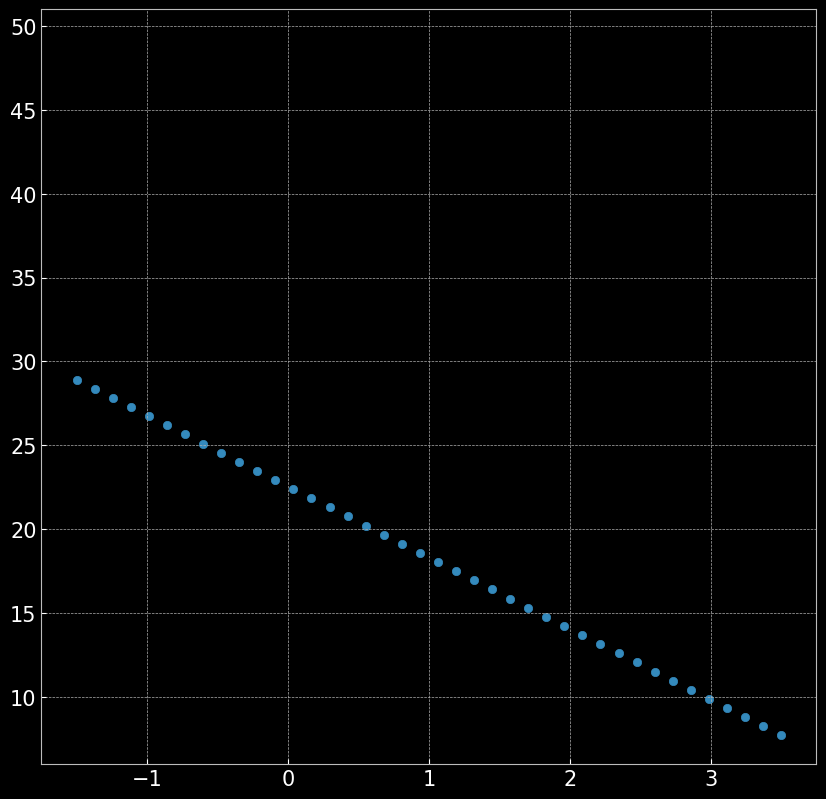

In [39]:
plt.scatter(np.array(test_feature[:, -1]), np.array(preds))
plt.ylim([6, 51])

# Manual Neural Network

1. A Bunch of Linear Regressions
2. A Nonlinear Function
3. Another Linear Regression

$$ \frac{\partial \sigma}{\partial u}(x) = \sigma(x) * (1 - \sigma(x)) $$ 

In [40]:
def sigmoid(x: ndarray) -> ndarray:
    return 1 / (1 + np.exp(-1.0 * x))

Text(0, 0.5, '$sigmoid(x)$')

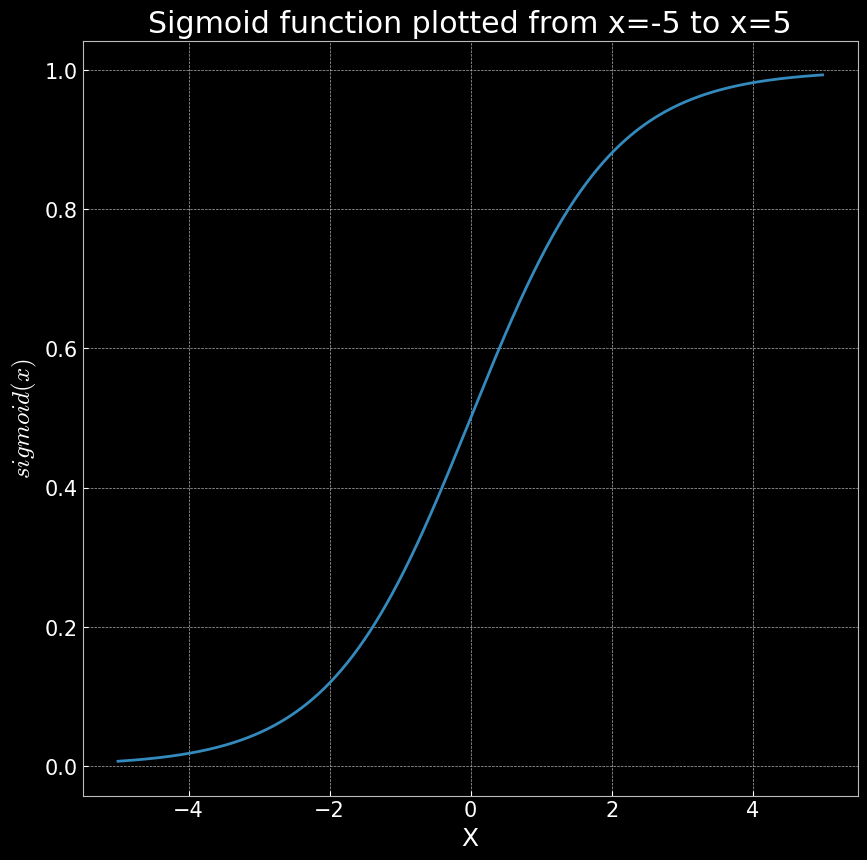

In [41]:
plt.plot(np.arange(-5, 5, 0.01), sigmoid(np.arange(-5, 5, 0.01)))
plt.title("Sigmoid function plotted from x=-5 to x=5")
plt.xlabel("X")
plt.ylabel("$sigmoid(x)$")

In [42]:
def init_weights(input_size: int, hidden_size: int) -> Dict[str, ndarray]:
    '''
    Initialize weights during the forward pass for step by step neural network model.
    '''
    weights_nn: Dict[str, ndarray] = {}
    weights_nn['W1'] = np.random.randn(input_size, hidden_size)
    weights_nn['B1'] = np.random.randn(1, hidden_size)
    weights_nn['W2'] = np.random.randn(hidden_size, 1)
    weights_nn['B2'] = np.random.randn(1, 1)
    return weights_nn

## Loss and Gradients

In [43]:
def loss_gradients(forward_info_nn: Dict[str, ndarray],
                   weights_nn: Dict[str, ndarray]) -> Dict[str, ndarray]:
    '''
    Compute the partial derivatives of the loss w/ respect to each 
    parameter in the neural net
    - dLdW2
    - dLdB2
    - dLdW1
    - dLdB1

    X \
        func_1 -> func_2 -> sigmoid -> func_3 -> func_4 -> loss_func -> L
    W1/        M1   |    N1              |    M2   |     P     |
                    B1                   W2        B2       real_Y
    '''
    dLdP = -(forward_info_nn['y'] - forward_info_nn['P'])

    dPdM2 = np.ones_like(forward_info_nn['M2'])

    dLdM2 = dLdP * dPdM2

    dPdB2 = np.ones_like(weights_nn['B2'])

    # target
    dLdB2 = (dLdP * dPdB2).sum(axis=0)

    dM2dW2 = np.transpose(forward_info_nn['O1'], (1, 0))

    # target
    dLdW2 = np.dot(dM2dW2, dLdP)

    dM2dO1 = np.transpose(weights_nn['W2'], (1, 0))

    dLdO1 = np.dot(dLdM2, dM2dO1)

    dO1dN1 = sigmoid(
        forward_info_nn['N1']) * (1 - sigmoid(forward_info_nn['N1']))

    dLdN1 = dLdO1 * dO1dN1

    # target
    dN1dB1 = np.ones_like(weights_nn['B1'])

    dN1dM1 = np.ones_like(forward_info_nn['M1'])

    dLdB1 = (dLdN1 * dN1dB1).sum(axis=0)

    dLdM1 = dLdN1 * dN1dM1

    dM1dW1 = np.transpose(forward_info_nn['X'], (1, 0))

    # target
    dLdW1 = np.dot(dM1dW1, dLdM1)

    loss_gradients_nn: Dict[str, ndarray] = {}
    loss_gradients_nn['W2'] = dLdW2
    loss_gradients_nn['B2'] = dLdB2.sum(axis=0)
    loss_gradients_nn['W1'] = dLdW1
    loss_gradients_nn['B1'] = dLdB1.sum(axis=0)

    return loss_gradients_nn

In [44]:
def forward_loss_nn(
        X: ndarray, y: ndarray,
        weights_nn: Dict[str, ndarray]) -> Tuple[Dict[str, ndarray], float]:
    '''
    COmpute the forward pass and the loss for the manaul nerual net
    '''
    M1 = np.dot(X, weights_nn['W1'])

    N1 = M1 + weights_nn['B1']

    O1 = sigmoid(N1)

    M2 = np.dot(O1, weights_nn['W2'])

    P = M2 + weights_nn['B2']

    loss_nn = np.mean(np.power(y - P, 2))  # mse

    forward_info_nn: Dict[str, ndarray] = {}
    forward_info_nn['X'] = X
    forward_info_nn['M1'] = M1
    forward_info_nn['N1'] = N1
    forward_info_nn['O1'] = O1
    forward_info_nn['M2'] = M2
    forward_info_nn['P'] = P
    forward_info_nn['y'] = y

    return forward_info_nn, loss_nn

## Train

In [45]:
def train(X_train: ndarray,
          y_train: ndarray,
          X_test: ndarray,
          y_test: ndarray,
          n_iter: int = 1000,
          test_every: int = 1000,
          learning_rate: float = 0.01,
          hidden_size: int = 13,
          batch_size: int = 100,
          return_losses: bool = False,
          return_weights: bool = False,
          return_scores: bool = False,
          seed: int = 1) -> None:

    if seed:
        np.random.seed(seed)

    start = 0

    # Intitialize weights
    weights_nn = init_weights(X_train.shape[1], hidden_size=hidden_size)

    # Permute data
    X_train, y_train = permute_data(X_train, y_train)

    losses = []

    val_scores = []

    for i in range(n_iter):

        # Generate batch
        if start >= X_train.shape[0]:
            X_train, y_train = permute_data(X_train, y_train)
            start = 0

        X_batch, y_batch = generate_batch(X_train, y_train, start, batch_size)
        start += batch_size

        # train net using generated batch
        forward_info_nn, loss = forward_loss_nn(X_batch, y_batch, weights_nn)

        if return_losses:
            losses.append(loss)

        loss_grads_nn = loss_gradients(forward_info_nn, weights_nn)
        for key in weights_nn.keys():
            weights_nn[key] -= learning_rate * loss_grads_nn[key]

        if return_scores:
            if i % test_every == 0 and i != 0:
                preds = predict(X_test, weights_nn)
                val_scores.append(r2_score(preds, y_test))
    if return_weights:
        return losses, weights_nn, val_scores

    return None

## Predict

In [46]:
def predict(X: ndarray, weights_nn: Dict[str, ndarray]) -> ndarray:
    '''
    Generate predictions from the manual neural net model
    '''
    M1 = np.dot(X, weights_nn['W1'])

    N1 = M1 + weights_nn['B1']

    O1 = sigmoid(N1)

    M2 = np.dot(O1, weights_nn['W2'])

    P = M2 + weights_nn['B2']

    return P

In [47]:
if TEST_ALL:
    num_iter = 10000
    test_every = 1000
    train_info = train(X_train, 
                       y_train, 
                       X_test, 
                       y_test,
                       n_iter=num_iter,
                       test_every = test_every,
                       learning_rate = 0.001,
                       batch_size=23, 
                       return_losses=True, 
                       return_weights=True, 
                       return_scores=True,
                       seed=80718)
    losses = train_info[0]
    weights = train_info[1]
    val_scores = train_info[2]

In [48]:
val_scores

[0.811702457864693,
 0.8371459533142913,
 0.8567684522572867,
 0.8599910685812278,
 0.8549472268097156,
 0.8494367722505569,
 0.8389739613893108,
 0.839987982149879,
 0.8380293498690526]

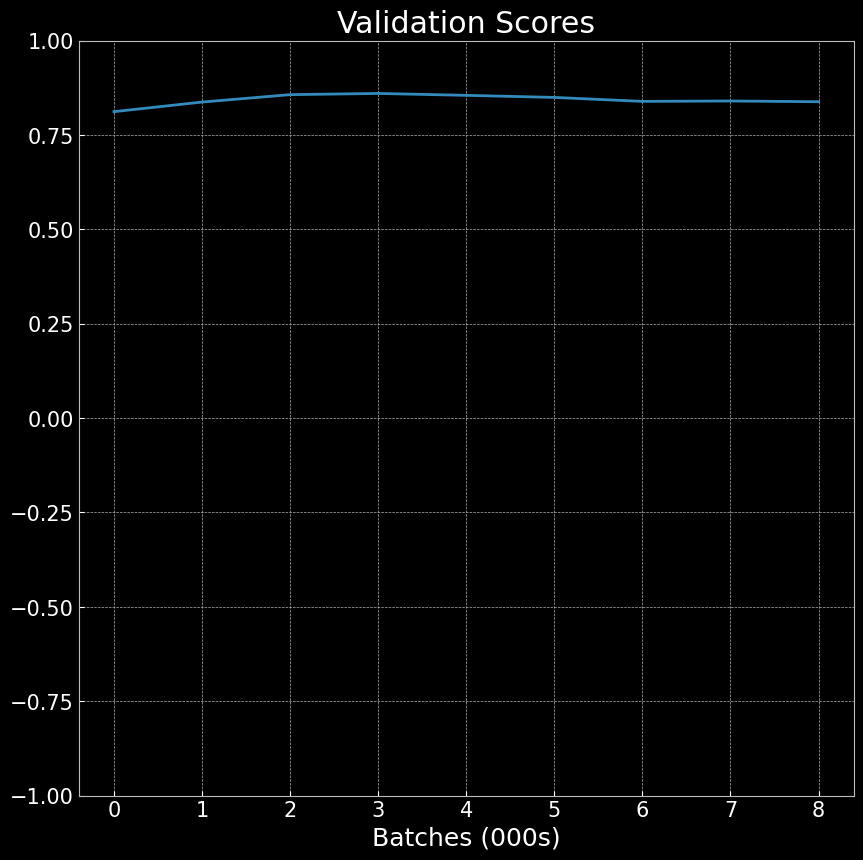

In [49]:
if TEST_ALL:
    plt.ylim([-1, 1])
    plt.plot(list(range(int(num_iter / test_every - 1))), val_scores); 
    plt.xlabel("Batches (000s)")
    plt.title("Validation Scores")

## Learning rate tuning

In [50]:
def r2_score_lr(learning_rate):
    train_info_nn = train(X_train,
                          y_train,
                          X_test,
                          y_test,
                          n_iter=100000,
                          test_every=100000,
                          learning_rate=learning_rate,
                          batch_size=23,
                          return_losses=True,
                          return_weights=True,
                          return_scores=True,
                          seed=80718)
    weights_nn = train_info_nn[1]
    preds = predict(X_test, weights_nn)
    return r2_score(y_test, preds)

In [51]:
if TEST_ALL:
    lrs = np.geomspace(1e-2, 1e-6, num=20)

In [52]:
if TEST_ALL:
    r2s = [r2_score_lr(lr) for lr in lrs]

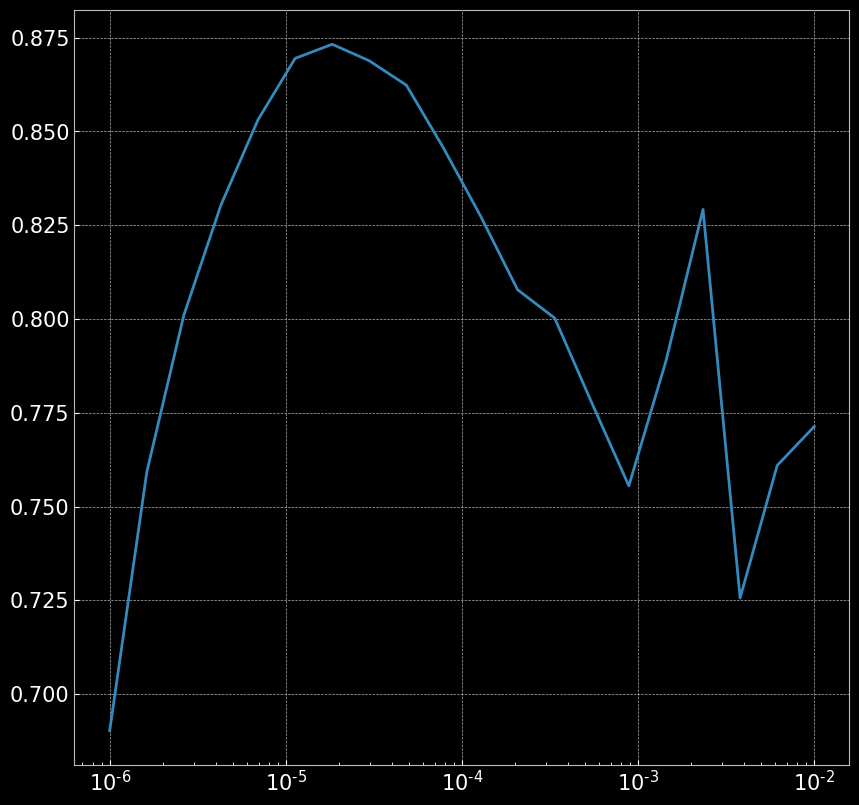

In [53]:
if TEST_ALL:
    # Make a plot with log scaling on the x axis
    plt.semilogx(lrs, r2s)

In [66]:
min_idx = r2s.index(min(r2s))
print('Best lr: {}, Minimum loss: {}'.format(lrs[min_idx], min(r2s)))

Best lr: 1e-06, Minimum loss: 0.6902792613988007


## Evaluating best model

In [67]:
train_info_nn = train(X_train,
                      y_train,
                      X_test,
                      y_test,
                      n_iter=4000,
                      test_every=1000,
                      learning_rate=0.001,
                      batch_size=23,
                      return_losses=True,
                      return_weights=True,
                      return_scores=True,
                      seed=180807)
losses = train_info_nn[0]
weights_nn = train_info_nn[1]

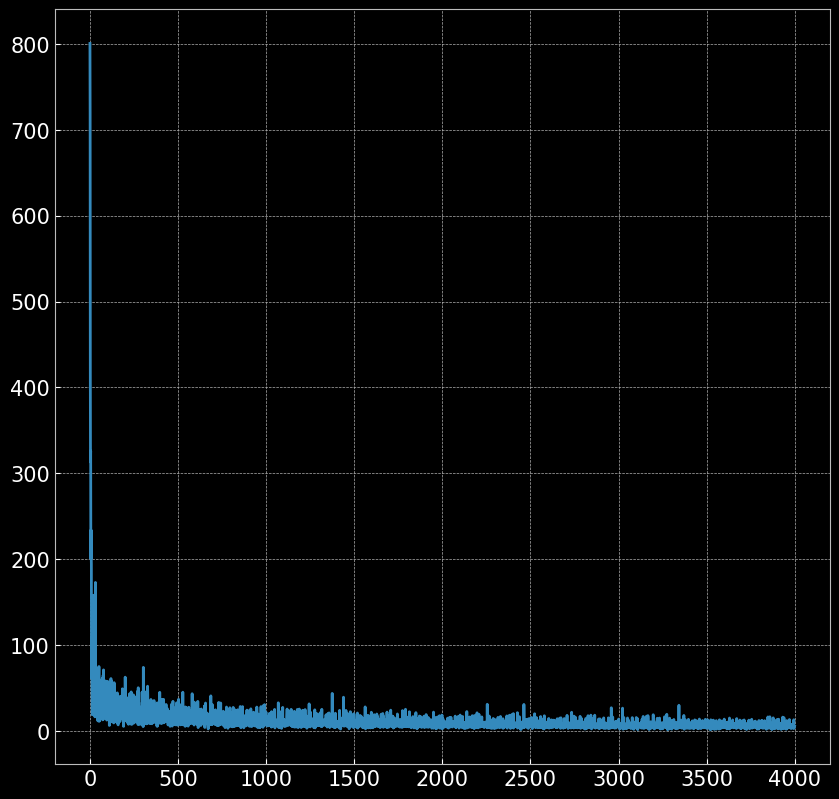

In [69]:
plt.plot(list(range(4000)), losses)

In [56]:
preds = predict(X_test, weights_nn)

##  Investigation of most important features
Most important combination of features are the two with abs() > 9:

In [57]:
weights_nn['W2']

array([[  6.88181019],
       [  7.39079869],
       [  5.63204199],
       [  7.23579823],
       [  7.62525138],
       [  6.75401976],
       [  3.32508428],
       [  9.72867071],
       [  5.6010739 ],
       [-10.24687493],
       [  5.56446463],
       [  5.6762053 ],
       [ -4.40884115]])

The combinations that fit the criteria above as index 7 and 9

In [70]:
print("Weights example (7th): \n", weights_nn['W1'][7])

Weights example (7th): 
 [-2.22519472  0.0869497   0.53711182 -0.96899065  1.53175091 -4.50568503
 -0.85398847 -0.96240945  0.09534602  0.7638102  -0.60207338  0.80642915
  0.86815819]


In [59]:
print("Mean abs error: ", round(mae(preds, y_test), 4), "\n"
      "Root mean sqr error: ", round(rmse(preds, y_test), 4))

Mean abs error:  2.5951 
Root mean sqr error:  3.8851


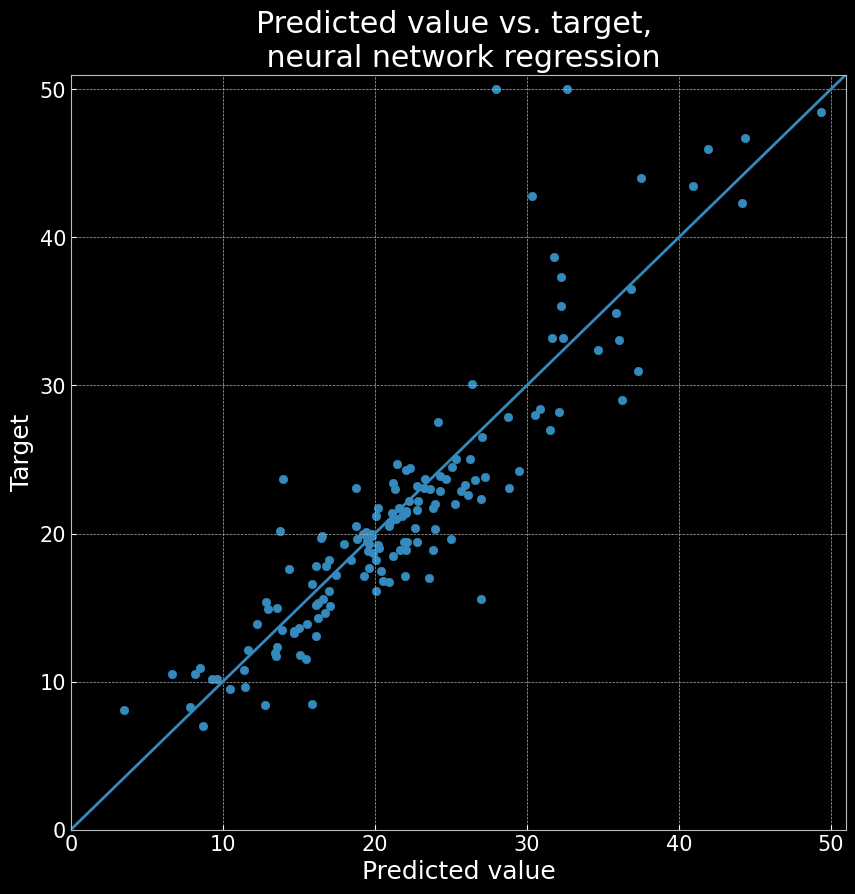

In [60]:
plt.xlabel("Predicted value")
plt.ylabel("Target")
plt.title("Predicted value vs. target, \n neural network regression")
plt.xlim([0, 51])
plt.ylim([0, 51])
plt.scatter(preds, y_test)
plt.plot([0, 51], [0, 51])

In [61]:
np.round(np.mean(np.array(np.abs(preds - y_test))), 4)

2.5951

In [62]:
np.round(np.mean(np.array(np.power(preds - y_test, 2))), 4)

15.0943

### [!] Theoretical relationship between most important feature (NO.12) and target

In [63]:
NUM = 40
a = np.repeat(X_test[:, :-1].mean(axis=0, keepdims=True), NUM, axis=0)
b = np.linspace(-1.5, 3.5, NUM).reshape(NUM, 1)
test_feature = np.concatenate([a, b], axis=1)
preds_test = predict(test_feature, weights_nn)[:, 0]

Text(0.5, 1.0, 'Most important feature vs target and predictions \n Manual neural net regression')

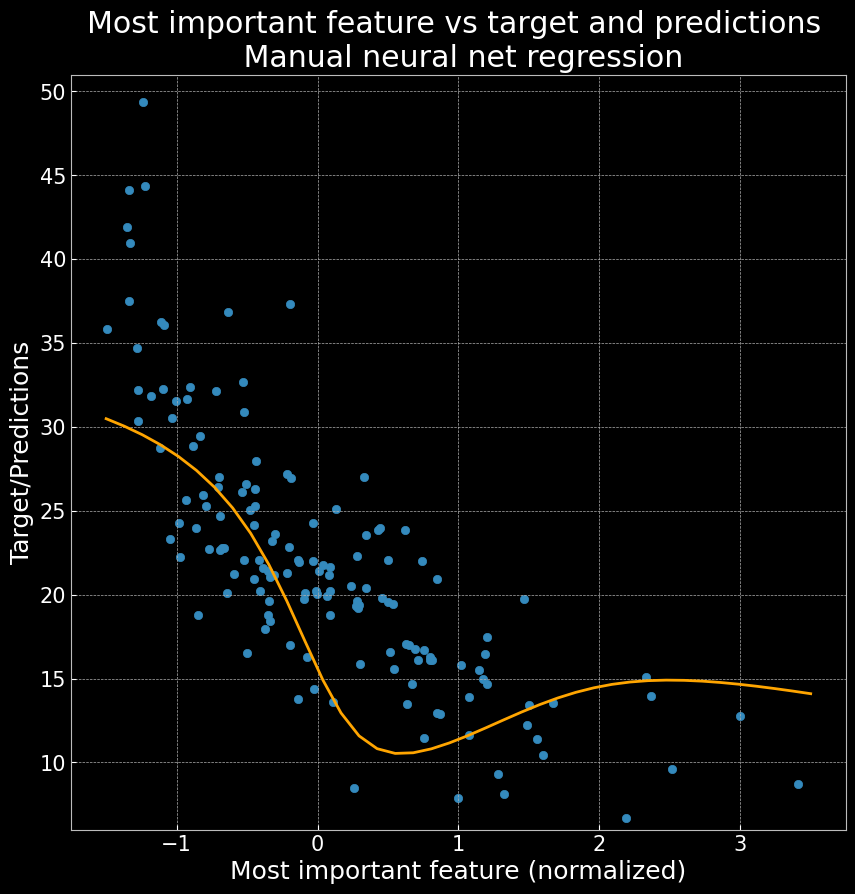

In [64]:
plt.scatter(X_test[:, 12], preds)
plt.plot(np.array(test_feature[:, -1]), preds_test, linewidth=2, c='orange')
plt.ylim([6, 51])
plt.xlabel("Most important feature (normalized)")
plt.ylabel("Target/Predictions")
plt.title(
    "Most important feature vs target and predictions \n Manual neural net regression"
)